In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/06-Data%20Munging/01-Fantasy%20Pros%20Projections%20-%20(2022.08.25).csv")
print(df.head(10))

                Player Team Pos  RushingAtt  RushingYds  RushingTD  \
0      Jonathan Taylor  IND  RB       325.4      1600.1       14.8   
1        Derrick Henry  TEN  RB       366.2      1640.1       13.0   
2        Austin Ekeler  LAC  RB       221.1       984.0        9.4   
3  Christian McCaffrey  CAR  RB       237.4      1057.4        7.6   
4            Joe Mixon  CIN  RB       287.4      1204.2        9.8   
5          Dalvin Cook  MIN  RB       276.2      1241.8        9.8   
6         Alvin Kamara   NO  RB       219.5       964.2        8.0   
7         Najee Harris  PIT  RB       298.3      1183.1        7.7   
8    Leonard Fournette   TB  RB       230.6       961.0        9.1   
9         James Conner  ARI  RB       226.4       927.1       10.3   

   Receptions  ReceivingYds  ReceivingTD   FL  ...  Int  FumblesRecovered  \
0        42.5         354.3          2.0  2.3  ...  0.0               0.0   
1        27.4         216.0          0.9  2.0  ...  0.0               0.0  

In [2]:
df.iloc[10:15, 0:10] # X, stops before last number, same with y. 15 and 10 are not reached

# iloc is integer location
# loc is label location

,Player,Team,Pos,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FL
10,Nick Chubb,CLE,RB,247.6,1230.0,8.4,25.3,206.2,1.0,1.6
11,Aaron Jones,GB,RB,193.7,913.2,6.1,60.2,493.0,3.8,1.5
12,Javonte Williams,DEN,RB,232.4,1025.2,7.8,45.9,345.8,2.7,1.7
13,Saquon Barkley,NYG,RB,244.9,1027.2,6.6,57.4,423.7,2.2,1.5
14,D'Andre Swift,DET,RB,216.1,900.7,6.5,64.7,477.5,2.4,1.8


In [3]:
print(", ".join(df.columns))

Player, Team, Pos, RushingAtt, RushingYds, RushingTD, Receptions, ReceivingYds, ReceivingTD, FL, PassingAtt, PassingCmp, PassingYds, PassingTD, TotalInt, TotalSacks, Int, FumblesRecovered, FumblesForced, DefensiveTDs, SafetysForced, PointsAllowed, YardsAgainst, FieldGoalsMade, FieldGoalsAttempted, ExtraPointsMade


In [4]:
scoring_weights = {
    "receptions": 1, # PPR
    "receiving_yds": 0.1,
    "receiving_td": 6,
    "FL": -2, #fumbles lost
    "rushing_yds": 0.1,
    "rushing_td": 6,
    "passing_yds": 0.04,
    "passing_td": 4,
    "int": -2
}

In [5]:
df["FantasyPoints"] = (
    df["Receptions"]*scoring_weights["receptions"] + df["ReceivingYds"]*scoring_weights["receiving_yds"] + \
    df["ReceivingTD"]*scoring_weights["receiving_td"] + df["FL"]*scoring_weights["FL"] + \
    df["RushingYds"]*scoring_weights["rushing_yds"] + df["RushingTD"]*scoring_weights["rushing_td"] + \
    df["PassingYds"]*scoring_weights["passing_yds"] + df["PassingTD"]*scoring_weights["passing_td"] + \
    df["Int"]*scoring_weights["int"])

In [6]:
df["Pos"].isin(["QB", "WR", "RB", "TE"])  # hecks if pos is in the list

0       True
1       True
2       True
3       True
4       True
       ...  
712    False
713    False
714    False
715    False
716    False
Name: Pos, Length: 717, dtype: bool

In [7]:
df.head()

,Player,Team,Pos,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FL,...,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,YardsAgainst,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,FantasyPoints
0,Jonathan Taylor,IND,RB,325.4,1600.1,14.8,42.5,354.3,2.0,2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.14
1,Derrick Henry,TEN,RB,366.2,1640.1,13.0,27.4,216.0,0.9,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292.41
2,Austin Ekeler,LAC,RB,221.1,984.0,9.4,74.5,665.0,5.3,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,324.60
3,Christian McCaffrey,CAR,RB,237.4,1057.4,7.6,88.9,757.9,4.1,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.83
4,Joe Mixon,CIN,RB,287.4,1204.2,9.8,47.1,341.9,2.6,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.91


In [8]:
# rb_df is a df where pos == rb
rb_df = df.loc[df["Pos"] == "RB"]

rb_df.head()

,Player,Team,Pos,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FL,...,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,YardsAgainst,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,FantasyPoints
0,Jonathan Taylor,IND,RB,325.4,1600.1,14.8,42.5,354.3,2.0,2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.14
1,Derrick Henry,TEN,RB,366.2,1640.1,13.0,27.4,216.0,0.9,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292.41
2,Austin Ekeler,LAC,RB,221.1,984.0,9.4,74.5,665.0,5.3,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,324.60
3,Christian McCaffrey,CAR,RB,237.4,1057.4,7.6,88.9,757.9,4.1,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.83
4,Joe Mixon,CIN,RB,287.4,1204.2,9.8,47.1,341.9,2.6,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.91


In [9]:
base_columns = ["Player", "Team", "Pos"]
rushing_columns = ["FantasyPoints", "Receptions", "ReceivingYds", "ReceivingTD", "RushingAtt", "RushingYds", "RushingTD", "FL"]

# base + rushing are the columns to display
rb_df = df.loc[(df["Pos"] == "RB", base_columns + rushing_columns)]

rb_df.head()

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL
0,Jonathan Taylor,IND,RB,334.14,42.5,354.3,2.0,325.4,1600.1,14.8,2.3
1,Derrick Henry,TEN,RB,292.41,27.4,216.0,0.9,366.2,1640.1,13.0,2.0
2,Austin Ekeler,LAC,RB,324.60,74.5,665.0,5.3,221.1,984.0,9.4,1.5
3,Christian McCaffrey,CAR,RB,337.83,88.9,757.9,4.1,237.4,1057.4,7.6,1.4
4,Joe Mixon,CIN,RB,272.91,47.1,341.9,2.6,287.4,1204.2,9.8,1.6


In [10]:
# sort RBs by RushingYds in descending order and get us back the top 15 rows.

rb_df.sort_values(by = "RushingYds", ascending = False).head(15)

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL
1,Derrick Henry,TEN,RB,292.41,27.4,216.0,0.9,366.2,1640.1,13.0,2.0
0,Jonathan Taylor,IND,RB,334.14,42.5,354.3,2.0,325.4,1600.1,14.8,2.3
5,Dalvin Cook,MIN,RB,265.29,44.9,334.1,1.5,276.2,1241.8,9.8,2.5
10,Nick Chubb,CLE,RB,222.12,25.3,206.2,1.0,247.6,1230.0,8.4,1.6
4,Joe Mixon,CIN,RB,272.91,47.1,341.9,2.6,287.4,1204.2,9.8,1.6
7,Najee Harris,PIT,RB,274.34,60.7,397.3,2.1,298.3,1183.1,7.7,1.6
3,Christian McCaffrey,CAR,RB,337.83,88.9,757.9,4.1,237.4,1057.4,7.6,1.4
23,Miles Sanders,PHI,RB,195.26,31.2,221.2,1.1,204.4,1043.4,5.7,1.6
20,Elijah Mitchell,SF,RB,197.42,25.8,196.7,1.3,239.0,1027.5,7.3,1.2
13,Saquon Barkley,NYG,RB,252.29,57.4,423.7,2.2,244.9,1027.2,6.6,1.5


In [11]:
# get us back descriptive stats about our rb_df and transpose the DataFrame.
# transpose switches columns

rb_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FantasyPoints,170.0,79.554294,86.379125,0.0,15.590,39.765,124.280,337.83
Receptions,170.0,16.382353,17.428021,0.0,3.925,8.750,25.375,88.90
ReceivingYds,170.0,126.287647,138.582555,0.0,28.900,65.900,194.850,757.90
ReceivingTD,170.0,0.690000,0.881140,0.0,0.100,0.300,1.000,5.30
RushingAtt,170.0,74.400588,86.359652,0.0,8.125,27.200,130.100,366.20
RushingYds,170.0,327.455294,378.814536,0.0,46.425,142.850,546.500,1640.10
RushingTD,170.0,2.470588,3.014907,0.0,0.325,0.950,3.750,14.80
FL,170.0,0.582941,0.667595,0.0,0.000,0.200,1.000,3.30


In [12]:
# first 10 rows
print(rb_df["RushingAtt"][:10])

0    325.4
1    366.2
2    221.1
3    237.4
4    287.4
5    276.2
6    219.5
7    298.3
8    230.6
9    226.4
Name: RushingAtt, dtype: float64


In [13]:
print(rb_df["RushingAtt"].max()) # maximum of a Series column 

print(rb_df["RushingAtt"].std()) # standard deviation of a Series column

print(rb_df["RushingAtt"].min()) # minimum of a Series column

print(rb_df["RushingAtt"].std()) # standard deviation of a Series column

print(rb_df["RushingAtt"].quantile(0.75)) # Series 75th percentile for RushingAtt

print(rb_df["RushingAtt"].quantile(0.25)) # Series 25th percentile for RushingAtt

366.2
86.35965218942901
0.0
86.35965218942901
130.1
8.125


In [14]:
"""
The rank method can be used to rank players based on a given column.
Set ascending = False to rank the column in descending order.
"""

rb_df["RushingTDRank"] = rb_df["RushingTD"].rank(ascending = False)
rb_df.sort_values(by = "RushingTDRank").head(5)

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL,RushingTDRank
0,Jonathan Taylor,IND,RB,334.14,42.5,354.3,2.0,325.4,1600.1,14.8,2.3,1.0
1,Derrick Henry,TEN,RB,292.41,27.4,216.0,0.9,366.2,1640.1,13.0,2.0,2.0
9,James Conner,ARI,RB,245.06,44.1,358.5,2.3,226.4,927.1,10.3,1.6,3.0
21,Damien Harris,NE,RB,190.20,18.2,136.0,0.5,214.8,976.0,10.1,1.4,4.0
4,Joe Mixon,CIN,RB,272.91,47.1,341.9,2.6,287.4,1204.2,9.8,1.6,5.5


In [15]:
# Counts for unique values
print(rb_df["RushingAtt"].value_counts())

0.0      16
2.2       4
3.0       2
65.8      2
114.2     2
         ..
134.0     1
193.7     1
26.9      1
75.0      1
179.7     1
Name: RushingAtt, Length: 144, dtype: int64


<AxesSubplot:xlabel='RushingAtt', ylabel='Count'>

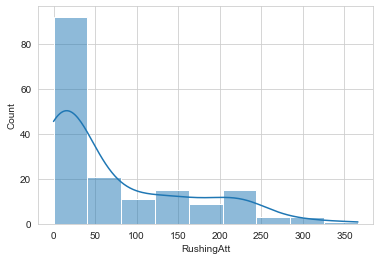

In [16]:
import seaborn as sns

sns.set_style("whitegrid")

sns.histplot(rb_df["RushingAtt"], kde = True)
# sns.displot(rb_df["RushingAtt"], kde = True) # plot is taller

In [17]:
henry = rb_df.loc[rb_df["Player"] == "Derrick Henry"]
henry = henry.transpose() # transpose the DataFrame

In [18]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
print(henry)

                           1
Player         Derrick Henry
Team                     TEN
Pos                       RB
FantasyPoints         292.41
Receptions              27.4
ReceivingYds           216.0
ReceivingTD              0.9
RushingAtt             366.2
RushingYds            1640.1
RushingTD               13.0
FL                       2.0
RushingTDRank            2.0


In [19]:
henry.index = henry.index.rename("Category")

In [20]:
henry

,1
Category,
Player,Derrick Henry
Team,TEN
Pos,RB
FantasyPoints,292.41
Receptions,27.4
ReceivingYds,216.0
ReceivingTD,0.9
RushingAtt,366.2
RushingYds,1640.1


In [21]:
henry.columns = ["Value"] 
henry

,Value
Category,
Player,Derrick Henry
Team,TEN
Pos,RB
FantasyPoints,292.41
Receptions,27.4
ReceivingYds,216.0
ReceivingTD,0.9
RushingAtt,366.2
RushingYds,1640.1


In [22]:
rb_df

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL,RushingTDRank
0,Jonathan Taylor,IND,RB,334.14,42.5,354.3,2.0,325.4,1600.1,14.8,2.3,1.0
1,Derrick Henry,TEN,RB,292.41,27.4,216.0,0.9,366.2,1640.1,13.0,2.0,2.0
2,Austin Ekeler,LAC,RB,324.60,74.5,665.0,5.3,221.1,984.0,9.4,1.5,7.0
3,Christian McCaffrey,CAR,RB,337.83,88.9,757.9,4.1,237.4,1057.4,7.6,1.4,16.5
4,Joe Mixon,CIN,RB,272.91,47.1,341.9,2.6,287.4,1204.2,9.8,1.6,5.5
5,Dalvin Cook,MIN,RB,265.29,44.9,334.1,1.5,276.2,1241.8,9.8,2.5,5.5
6,Alvin Kamara,NO,RB,279.54,60.0,529.2,4.1,219.5,964.2,8.0,1.2,12.0
7,Najee Harris,PIT,RB,274.34,60.7,397.3,2.1,298.3,1183.1,7.7,1.6,15.0
8,Leonard Fournette,TB,RB,263.50,61.1,417.0,2.1,230.6,961.0,9.1,1.3,8.0
9,James Conner,ARI,RB,245.06,44.1,358.5,2.3,226.4,927.1,10.3,1.6,3.0


In [23]:
rb_df.values

array([['Jonathan Taylor', 'IND', 'RB', ..., 14.8, 2.3, 1.0],
       ['Derrick Henry', 'TEN', 'RB', ..., 13.0, 2.0, 2.0],
       ['Austin Ekeler', 'LAC', 'RB', ..., 9.4, 1.5, 7.0],
       ...,
       ['Reggie Bonnafon', 'WAS', 'RB', ..., 0.0, 0.0, 163.5],
       ['0', '0', 'RB', ..., 0.0, 0.0, 163.5],
       ['0', '0', 'RB', ..., 0.0, 0.0, 163.5]], dtype=object)

In [24]:
half_ppr_adp_url = "https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/06-Data%20Munging/02-ADP%20(Half%20PPR)%20-%20(2022.08.23).csv"

adp_url = "https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/06-Data%20Munging/02-ADP%20(Standard)%20-%20(2022.08.23).csv"

full_ppr_adp_url = "https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/06-Data%20Munging/02-ADP%20(PPR)%20-%20(2022.08.23).csv"

In [25]:
adp_df = pd.read_csv(full_ppr_adp_url, index_col = 0)

adp_df.head()

,Player,Team,Pos,ESPN,Fantrax,Sleeper,AVG
Rank,,,,,,,
1,Jonathan Taylor,IND,RB,1.0,1.0,1.0,1.0
2,Christian McCaffrey,CAR,RB,2.0,4.0,2.0,3.0
3,Austin Ekeler,LAC,RB,4.0,2.0,4.0,3.0
4,Cooper Kupp,LAR,WR,3.0,3.0,5.0,4.2
5,Derrick Henry,TEN,RB,5.0,6.0,3.0,4.8


In [26]:
adp_df["ADP RANK"] = adp_df["AVG"].rank()
adp_df.head()

,Player,Team,Pos,ESPN,Fantrax,Sleeper,AVG,ADP RANK
Rank,,,,,,,,
1,Jonathan Taylor,IND,RB,1.0,1.0,1.0,1.0,1.0
2,Christian McCaffrey,CAR,RB,2.0,4.0,2.0,3.0,2.5
3,Austin Ekeler,LAC,RB,4.0,2.0,4.0,3.0,2.5
4,Cooper Kupp,LAR,WR,3.0,3.0,5.0,4.2,4.0
5,Derrick Henry,TEN,RB,5.0,6.0,3.0,4.8,5.0


In [27]:
adp_df_cutoff = adp_df[:100]

In [28]:
print(adp_df_cutoff.shape)

(100, 8)


In [29]:
replacement_players = {
    "RB": "",
    "QB": "",
    "WR": "",
    "TE": ""
}

for _, row in adp_df_cutoff.iterrows():
    position = row["Pos"] # extract out the position and player value from each row as we loop through it
    player = row["Player"]

    # Each of these positions is last in the adp cut off list as each position gets replaced with a later entry
    if position in replacement_players: # if the position is in the dict"s keys
        replacement_players[position] = player # set that player as the replacement player

replacement_players

{'RB': 'Ken Walker III',
 'QB': 'Trey Lance',
 'WR': 'Robert Woods',
 'TE': 'Dawson Knox'}

In [30]:
df = df[["Player", "Pos", "Team", "FantasyPoints"]] # filtering out the columns we need.

df.head()

,Player,Pos,Team,FantasyPoints
0,Jonathan Taylor,RB,IND,334.14
1,Derrick Henry,RB,TEN,292.41
2,Austin Ekeler,RB,LAC,324.60
3,Christian McCaffrey,RB,CAR,337.83
4,Joe Mixon,RB,CIN,272.91


In [31]:
replacement_values = {} # initialize an empty dictionary

for position, player_name in replacement_players.items():
    player_df = df.loc[df["Player"] == player_name]

    # because this is a series object we get back, we need to use the tolist method
    # to get back the series as a list. The list object is of length 1, and the 1 item has the value we need
    # we tack on a [0] to get the value we need.

    replacement_values[position] = player_df["FantasyPoints"].tolist()[0]

print(replacement_values)

{'RB': 118.25, 'QB': 328.066, 'WR': 200.22, 'TE': 145.09000000000003}


In [32]:
pd.set_option("chained_assignment", None)

df = df.loc[df["Pos"].isin(["QB", "RB", "WR", "TE"])]
df["VOR"] = df.apply(
    lambda row: row["FantasyPoints"] - replacement_values.get(row["Pos"]), axis = 1
)

df.head()

# You can either run a function across an entire column, in which case axis = 0
# (In pandas, axis = 1 is typically used to designate an operation on the column axis.
# However, when using apply, it"s more useful to think that setting axis = 1
# gives you access to the columns of each row, whereas setting axis = 0 does not). 

,Player,Pos,Team,FantasyPoints,VOR
0,Jonathan Taylor,RB,IND,334.14,215.89
1,Derrick Henry,RB,TEN,292.41,174.16
2,Austin Ekeler,RB,LAC,324.60,206.35
3,Christian McCaffrey,RB,CAR,337.83,219.58
4,Joe Mixon,RB,CIN,272.91,154.66


In [33]:
# pd.set_option("display.max_rows", None) # turn off truncation of rows setting inherent to pandas

df["VOR Rank"] = df["VOR"].rank(ascending = False)

df.sort_values(by = "VOR", ascending = False).head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
3,Christian McCaffrey,RB,CAR,337.830,219.580,1.0
0,Jonathan Taylor,RB,IND,334.140,215.890,2.0
2,Austin Ekeler,RB,LAC,324.600,206.350,3.0
1,Derrick Henry,RB,TEN,292.410,174.160,4.0
6,Alvin Kamara,RB,NO,279.540,161.290,5.0
170,Cooper Kupp,WR,LAR,359.160,158.940,6.0
7,Najee Harris,RB,PIT,274.340,156.090,7.0
4,Joe Mixon,RB,CIN,272.910,154.660,8.0
5,Dalvin Cook,RB,MIN,265.290,147.040,9.0
8,Leonard Fournette,RB,TB,263.500,145.250,10.0


In [34]:
df.groupby("Pos")["VOR"].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,92.0,-214.926652,140.651245,-328.066,-319.8085,-312.232,-62.0435,87.208
RB,170.0,-38.695706,86.379125,-118.250,-102.6600,-78.485,6.0300,219.580
TE,142.0,-91.744507,57.018349,-145.090,-130.7500,-115.845,-72.6050,127.060
WR,246.0,-117.704390,83.762582,-200.220,-186.4275,-160.265,-60.5550,158.940


In [35]:
# Makes the VOR between 0 and 1, called normalization
df["VOR"] = df["VOR"].apply(lambda x: (x - df["VOR"].min()) / (df["VOR"].max() - df["VOR"].min()))

In [36]:
df = df.sort_values(by='VOR Rank')
df.head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
3,Christian McCaffrey,RB,CAR,337.830,1.000000,1.0
0,Jonathan Taylor,RB,IND,334.140,0.993262,2.0
2,Austin Ekeler,RB,LAC,324.600,0.975842,3.0
1,Derrick Henry,RB,TEN,292.410,0.917063,4.0
6,Alvin Kamara,RB,NO,279.540,0.893563,5.0
170,Cooper Kupp,WR,LAR,359.160,0.889272,6.0
7,Najee Harris,RB,PIT,274.340,0.884067,7.0
4,Joe Mixon,RB,CIN,272.910,0.881456,8.0
5,Dalvin Cook,RB,MIN,265.290,0.867542,9.0
8,Leonard Fournette,RB,TB,263.500,0.864274,10.0


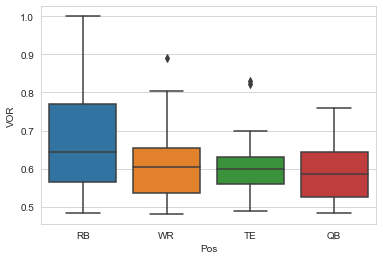

In [37]:
# calculating how many players are in our draft pool.
num_teams = 12
num_spots = 16 # 1 QB, 2RB, 2WR, 1TE, 1FLEX, 1K, 1DST, 7 BENCH
draft_pool = num_teams * num_spots

df_copy = df[:draft_pool]

sns.boxplot(x = df_copy["Pos"], y = df_copy["VOR"]);

In [38]:
df = df.rename({
    "VOR": "Value",
    "VOR Rank": "Value Rank"
}, axis = 1) # axis = 1 means make the change along the column axis.

In [39]:
adp_df = adp_df.rename({
    "PLAYER": "Player",
    "POS": "Pos",
    "AVG": "Average ADP",
    "ADP RANK": "ADP Rank"
}, axis = 1) # let's rename some columns first.

In [40]:
df.columns

Index(['Player', 'Pos', 'Team', 'FantasyPoints', 'Value', 'Value Rank'], dtype='object')

In [41]:
adp_df.columns

Index(['Player', 'Team', 'Pos', 'ESPN', 'Fantrax', 'Sleeper', 'Average ADP', 'ADP Rank'], dtype='object')

In [42]:
final_df = df.merge(adp_df, how = "left", on = ["Player", "Pos","Team"])
final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank
0,Christian McCaffrey,RB,CAR,337.83,1.000000,1.0,2.0,4.0,2.0,3.0,2.5
1,Jonathan Taylor,RB,IND,334.14,0.993262,2.0,1.0,1.0,1.0,1.0,1.0
2,Austin Ekeler,RB,LAC,324.60,0.975842,3.0,4.0,2.0,4.0,3.0,2.5
3,Derrick Henry,RB,TEN,292.41,0.917063,4.0,5.0,6.0,3.0,4.8,5.0
4,Alvin Kamara,RB,NO,279.54,0.893563,5.0,11.0,20.0,18.0,16.0,15.0


In [104]:
final_df["ADP - Value"] = final_df["ADP Rank"] - final_df["Value Rank"]
final_df.head()

# Positive difference in "Diff in ADP and Value" signifies a sleeper, we want that

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value,ADP - Value
0,Christian McCaffrey,RB,CAR,337.83,1.000000,1.0,2.0,4.0,2.0,3.0,2.5,1.5,1.5
1,Jonathan Taylor,RB,IND,334.14,0.993262,2.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
2,Austin Ekeler,RB,LAC,324.60,0.975842,3.0,4.0,2.0,4.0,3.0,2.5,-0.5,-0.5
3,Derrick Henry,RB,TEN,292.41,0.917063,4.0,5.0,6.0,3.0,4.8,5.0,1.0,1.0
4,Alvin Kamara,RB,NO,279.54,0.893563,5.0,11.0,20.0,18.0,16.0,15.0,10.0,10.0


In [112]:
draft_pool = final_df.sort_values(by = "ADP Rank")[:196]

rb_draft_pool = draft_pool.loc[draft_pool["Pos"] == "RB"]
qb_draft_pool = draft_pool.loc[draft_pool["Pos"] == "QB"]
wr_draft_pool = draft_pool.loc[draft_pool["Pos"] == "WR"]
te_draft_pool = draft_pool.loc[draft_pool["Pos"] == "TE"]

In [114]:
# top 10 RB sleepers for this year's draft
rb_draft_pool.sort_values(by = "ADP - Value", ascending = False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value,ADP - Value
144,Zamir White,RB,LV,85.42,0.539100,145.0,NaN,212.0,203.0,218.8,228.0,83.0,83.0
80,Brian Robinson Jr.,RB,WAS,129.76,0.620065,81.0,178.0,94.0,164.0,164.8,159.0,78.0,78.0
119,Mark Ingram II,RB,NO,105.79,0.576296,120.0,212.0,193.0,176.0,187.2,190.0,70.0,70.0
93,Kenneth Gainwell,RB,PHI,122.96,0.607648,94.0,196.0,136.0,162.0,162.2,157.0,63.0,63.0
46,Rhamondre Stevenson,RB,NE,173.24,0.699459,47.0,98.0,95.0,105.0,108.2,103.0,56.0,56.0
129,Tyler Allgeier,RB,ATL,98.86,0.563641,130.0,203.0,155.0,160.0,185.0,184.0,54.0,54.0
141,Gus Edwards,RB,BAL,87.36,0.542643,142.0,NaN,160.0,207.0,195.3,196.0,54.0,54.0
109,Jamaal Williams,RB,DET,116.58,0.595998,110.0,167.0,154.0,188.0,165.4,161.0,51.0,51.0
116,Marlon Mack,RB,HOU,108.42,0.581098,117.0,168.0,194.0,169.0,168.4,166.0,49.0,49.0
43,Chase Edmonds,RB,MIA,174.14,0.701103,44.0,105.0,88.0,94.0,93.2,93.0,49.0,49.0


In [115]:
# top 10 RB over valued for this year's draft
rb_draft_pool.sort_values(by = "ADP - Value", ascending = True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value,ADP - Value
179,Ronald Jones II,RB,KC,59.39,0.491569,180.0,NaN,121.0,154.0,143.5,135.0,-45.0,-45.0
242,Myles Gaskin,RB,MIA,29.05,0.436169,243.0,NaN,216.0,274.0,218.5,227.0,-16.0,-16.0
107,Ken Walker III,RB,SEA,118.25,0.599048,107.5,121.0,89.0,80.0,105.6,100.0,-7.5,-7.5
19,Nick Chubb,RB,CLE,222.12,0.788714,20.0,26.0,17.0,15.0,18.2,17.0,-3.0,-3.0
8,Dalvin Cook,RB,MIN,265.29,0.867542,9.0,9.0,8.0,7.0,7.8,8.0,-1.0,-1.0
1,Jonathan Taylor,RB,IND,334.14,0.993262,2.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
2,Austin Ekeler,RB,LAC,324.60,0.975842,3.0,4.0,2.0,4.0,3.0,2.5,-0.5,-0.5
6,Najee Harris,RB,PIT,274.34,0.884067,7.0,8.0,7.0,9.0,7.6,7.0,0.0,0.0
219,Jeff Wilson Jr.,RB,SF,43.03,0.461696,220.0,NaN,225.0,NaN,216.0,220.5,0.5,0.5
3,Derrick Henry,RB,TEN,292.41,0.917063,4.0,5.0,6.0,3.0,4.8,5.0,1.0,1.0


In [116]:
# By this point, adp data has been analyzed and added back to main df, up to date player data can now be seen

In [146]:
name = "Jeudy"

quick_cols = ["Player", "Pos", "Value Rank", "ADP Rank", "ADP - Value"]
full_cols = ["Player", "Pos", "Team", "FantasyPoints", "Value", "Value Rank", "Average ADP", "ADP Rank", "ADP - Value"]
picks_df = final_df.loc[(final_df["Player"] == name, quick_cols)]

if picks_df.empty:
    print("None returned\n\n")
else:
    print(picks_df)

search = name.split(" ")[-1]
player_df = final_df["Player"]
player_df.reset_index(drop = True, inplace = True)
players = []

for df in player_df:
    if search in df.split(' ')[-1]:
        players.append(df)
        
for player in players:
    data = final_df.loc[final_df["Player"] == player, quick_cols]
    print(data, end = "\n\n")
    
    dff = draft_pool.loc[draft_pool["Pos"] == data["Pos"].tolist()[0], quick_cols]
    print(dff.sort_values(by = "ADP - Value", ascending = False)[:10])
    print('~' * 70)

None returned


         Player Pos  Value Rank  ADP Rank  ADP - Value
79  Jerry Jeudy  WR        80.0      62.0        -18.0

               Player Pos  Value Rank  ADP Rank  ADP - Value
160   Robbie Anderson  WR       161.0     199.0         38.0
165  Marvin Jones Jr.  WR       166.0     204.0         38.0
195      Nico Collins  WR       196.0     216.0         20.0
187       Corey Davis  WR       188.0     200.0         12.0
202       K.J. Osborn  WR       203.0     212.0          9.0
146    Mecole Hardman  WR       147.0     154.0          7.0
69     Michael Thomas  WR        70.0      75.0          5.0
136     Jakobi Meyers  WR       137.0     141.0          4.0
190     Jalen Tolbert  WR       191.0     194.0          3.0
198     Van Jefferson  WR       199.0     201.0          2.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
